In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
#We have the data for the north wales and sussex stop and search, street-level crime, and outcome between the period of 2019 and 2020
#the first of the work would be to prepare the data for basic understanding and possible analysis

In [25]:
#this is a snapshot of the north wales outcomes data for 2019
north_wales_outcomes_jan_2019 = pd.read_csv("2019-01-north-wales-outcomes.csv", sep = ",")
north_wales_outcomes_jan_2019.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,f7e2f9fe540c0b92fcde32af3a6c068ce0ef94a8312679...,2019-01,North Wales Police,North Wales Police,-3.025115,53.036238,On or near BERSHAM ROAD,W01000367,Wrexham 014B,Unable to prosecute suspect
1,4a2d2c0441b83bbc573c0b4cf9887e35d7bfcd44d8e44f...,2019-01,North Wales Police,North Wales Police,-3.059700,52.981494,On or near OGWEN,W01000409,Wrexham 017E,Unable to prosecute suspect
2,cfcacce6658462b515a8c189fb883a50a2c2511d6a7713...,2019-01,North Wales Police,North Wales Police,-3.195833,52.979690,On or near B5103,W01000208,Denbighshire 016C,Investigation complete; no suspect identified
3,01c4161baf9c15025d76aedae8e2fa5c2015c89e26d09b...,2019-01,North Wales Police,North Wales Police,-3.057216,53.219763,On or near FISHERMANS' ROAD,W01000274,Flintshire 007B,Suspect charged
4,97acae85c8ff6316f6114a85b078377ae7cc06ec23d8a5...,2019-01,North Wales Police,North Wales Police,-3.001185,53.093759,On or near LLAY NEW ROAD,W01000391,Wrexham 003D,Investigation complete; no suspect identified


In [26]:
from functools import reduce

#loading all the data for north wales outcome for 2019
north_wales_outcomes_feb_2019 = pd.read_csv("2019-02-north-wales-outcomes.csv", sep = ",")
north_wales_outcomes_march_2019 = pd.read_csv("2019-03-north-wales-outcomes.csv", sep = ",")
north_wales_outcomes_april_2019 = pd.read_csv("2019-04-north-wales-outcomes.csv", sep = ",")
north_wales_outcomes_may_2019 = pd.read_csv("2019-05-north-wales-outcomes.csv", sep = ",")
north_wales_outcomes_june_2019 = pd.read_csv("2019-06-north-wales-outcomes.csv", sep = ",")
north_wales_outcomes_july_2019 = pd.read_csv("2019-07-north-wales-outcomes.csv", sep = ",")
north_wales_outcomes_august_2019 = pd.read_csv("2019-08-north-wales-outcomes.csv", sep = ",")
north_wales_outcomes_sep_2019 = pd.read_csv("2019-09-north-wales-outcomes.csv", sep = ",")
north_wales_outcomes_oct_2019 = pd.read_csv("2019-10-north-wales-outcomes.csv", sep = ",")
north_wales_outcomes_nov_2019 = pd.read_csv("2019-11-north-wales-outcomes.csv", sep = ",")
north_wales_outcomes_dec_2019 = pd.read_csv("2019-12-north-wales-outcomes.csv", sep = ",")

#combining all the data into one dataframe

dataframes = [north_wales_outcomes_jan_2019, north_wales_outcomes_feb_2019, north_wales_outcomes_march_2019, 
              north_wales_outcomes_april_2019, north_wales_outcomes_may_2019, north_wales_outcomes_june_2019, 
              north_wales_outcomes_july_2019, north_wales_outcomes_august_2019, north_wales_outcomes_sep_2019,
              north_wales_outcomes_oct_2019, north_wales_outcomes_nov_2019, north_wales_outcomes_dec_2019]

nw_outcome_2019 = pd.concat(dataframes, ignore_index = True, keys = ['a','b','c','d','e','f','g','h','i','j','k','l'])
nw_outcome_2019.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,f7e2f9fe540c0b92fcde32af3a6c068ce0ef94a8312679...,2019-01,North Wales Police,North Wales Police,-3.025115,53.036238,On or near BERSHAM ROAD,W01000367,Wrexham 014B,Unable to prosecute suspect
1,4a2d2c0441b83bbc573c0b4cf9887e35d7bfcd44d8e44f...,2019-01,North Wales Police,North Wales Police,-3.059700,52.981494,On or near OGWEN,W01000409,Wrexham 017E,Unable to prosecute suspect
2,cfcacce6658462b515a8c189fb883a50a2c2511d6a7713...,2019-01,North Wales Police,North Wales Police,-3.195833,52.979690,On or near B5103,W01000208,Denbighshire 016C,Investigation complete; no suspect identified
3,01c4161baf9c15025d76aedae8e2fa5c2015c89e26d09b...,2019-01,North Wales Police,North Wales Police,-3.057216,53.219763,On or near FISHERMANS' ROAD,W01000274,Flintshire 007B,Suspect charged
4,97acae85c8ff6316f6114a85b078377ae7cc06ec23d8a5...,2019-01,North Wales Police,North Wales Police,-3.001185,53.093759,On or near LLAY NEW ROAD,W01000391,Wrexham 003D,Investigation complete; no suspect identified


In [19]:
#quick data exploration
type(north_wales_outcomes_jan_2019)

pandas.core.frame.DataFrame

In [20]:
north_wales_outcomes_jan_2019.shape

(6985, 10)

In [21]:
north_wales_outcomes_feb_2019.shape

(4615, 10)

In [22]:
nw_outcome_2019['Location'].describe()

count                       56967
unique                       5815
top       On or near Parking Area
freq                         2748
Name: Location, dtype: object

In [23]:
nw_outcome_2019['Outcome type'].describe()

count                           56967
unique                             22
top       Unable to prosecute suspect
freq                            25436
Name: Outcome type, dtype: object

In [4]:
#to check for any missing values in data
print('null values for north_wales_outcomes_jan_2019 ?', north_wales_outcomes_jan_2019.isnull().values.any())
print('null values for north_wales_outcomes_feb_2019 ?', north_wales_outcomes_feb_2019.isnull().values.any())
print('null values for north_wales_outcomes_mar_2019 ?', north_wales_outcomes_march_2019.isnull().values.any())
print('null values for north_wales_outcomes_apr_2019 ?', north_wales_outcomes_april_2019.isnull().values.any())
print('null values for north_wales_outcomes_may_2019 ?', north_wales_outcomes_may_2019.isnull().values.any())
print('null values for north_wales_outcomes_jun_2019 ?', north_wales_outcomes_june_2019.isnull().values.any())
print('null values for north_wales_outcomes_jul_2019 ?', north_wales_outcomes_july_2019.isnull().values.any())
print('null values for north_wales_outcomes_aug_2019 ?', north_wales_outcomes_august_2019.isnull().values.any())
print('null values for north_wales_outcomes_sep_2019 ?', north_wales_outcomes_sep_2019.isnull().values.any())
print('null values for north_wales_outcomes_oct_2019 ?', north_wales_outcomes_oct_2019.isnull().values.any())
print('null values for north_wales_outcomes_nov_2019 ?', north_wales_outcomes_nov_2019.isnull().values.any())
print('null values for north_wales_outcomes_dec_2019 ?', north_wales_outcomes_dec_2019.isnull().values.any())

null values for north_wales_outcomes_jan_2019 ? False
null values for north_wales_outcomes_feb_2019 ? False
null values for north_wales_outcomes_mar_2019 ? False
null values for north_wales_outcomes_apr_2019 ? True
null values for north_wales_outcomes_may_2019 ? True
null values for north_wales_outcomes_jun_2019 ? False
null values for north_wales_outcomes_jul_2019 ? True
null values for north_wales_outcomes_aug_2019 ? False
null values for north_wales_outcomes_sep_2019 ? False
null values for north_wales_outcomes_oct_2019 ? True
null values for north_wales_outcomes_nov_2019 ? False
null values for north_wales_outcomes_dec_2019 ? True


In [30]:
north_wales_outcomes_april_2019.columns[north_wales_outcomes_april_2019.isna().any()].tolist()
north_wales_outcomes_may_2019.columns[north_wales_outcomes_may_2019.isna().any()].tolist()
north_wales_outcomes_july_2019.columns[north_wales_outcomes_july_2019.isna().any()].tolist()
north_wales_outcomes_oct_2019.columns[north_wales_outcomes_oct_2019.isna().any()].tolist()
north_wales_outcomes_dec_2019.columns[north_wales_outcomes_dec_2019.isna().any()].tolist()

['Longitude', 'Latitude', 'LSOA code', 'LSOA name']

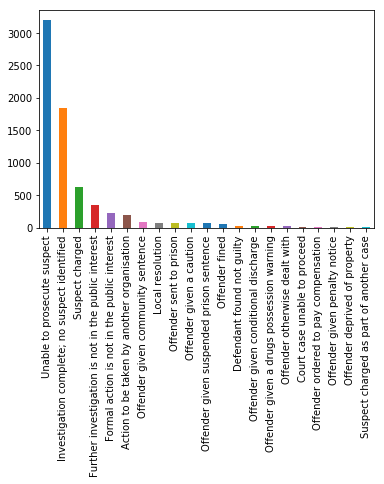

In [38]:
#from the plot, unable to prosecute is predominant followed by investigation complete; no suspect identified
north_wales_outcomes_jan_2019['Outcome type'].value_counts().plot(kind = 'bar')
plt.show()

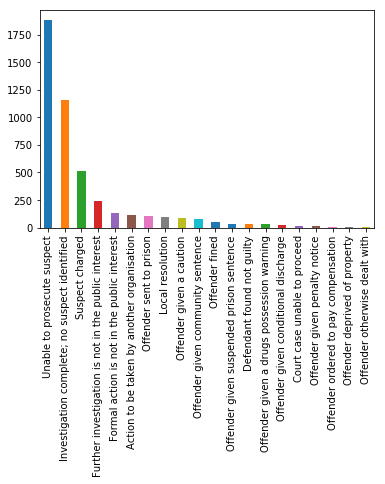

In [40]:
north_wales_outcomes_feb_2019['Outcome type'].value_counts().plot(kind = 'bar')
plt.show()

In [2]:
sussex_outcomes_jan_2019 = pd.read_csv("2019-01-sussex-outcomes.csv", sep = ",")
sussex_outcomes_feb_2019 = pd.read_csv("2019-02-sussex-outcomes.csv", sep = ",")
sussex_outcomes_mar_2019 = pd.read_csv("2019-03-sussex-outcomes.csv", sep = ",")
sussex_outcomes_apr_2019 = pd.read_csv("2019-04-sussex-outcomes.csv", sep = ",")
sussex_outcomes_may_2019 = pd.read_csv("2019-05-sussex-outcomes.csv", sep = ",")
sussex_outcomes_jun_2019 = pd.read_csv("2019-06-sussex-outcomes.csv", sep = ",")
sussex_outcomes_jul_2019 = pd.read_csv("2019-07-sussex-outcomes.csv", sep = ",")
sussex_outcomes_aug_2019 = pd.read_csv("2019-08-sussex-outcomes.csv", sep = ",")
sussex_outcomes_sep_2019 = pd.read_csv("2019-09-sussex-outcomes.csv", sep = ",")
sussex_outcomes_oct_2019 = pd.read_csv("2019-10-sussex-outcomes.csv", sep = ",")
sussex_outcomes_nov_2019 = pd.read_csv("2019-11-sussex-outcomes.csv", sep = ",")
sussex_outcomes_dec_2019 = pd.read_csv("2019-12-sussex-outcomes.csv", sep = ",")

In [4]:
dataframes1 = [sussex_outcomes_jan_2019, sussex_outcomes_feb_2019, sussex_outcomes_mar_2019, sussex_outcomes_apr_2019,
               sussex_outcomes_may_2019, sussex_outcomes_jun_2019, sussex_outcomes_jul_2019, sussex_outcomes_aug_2019,
               sussex_outcomes_sep_2019, sussex_outcomes_oct_2019, sussex_outcomes_nov_2019, sussex_outcomes_dec_2019]
ssx_outcome = pd.concat(dataframes1, ignore_index = True)
ssx_outcome.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,1a872dcc114c72adcc2dfa00cdf5f5e0a71355b4eef3a9...,2019-01,Sussex Police,Sussex Police,0.278852,50.796558,On or near STATION APPROACH,E01020922,Eastbourne 004C,Unable to prosecute suspect
1,7bbd362b3dd84068c1995c166a4a7dc3d3bee3053dfbca...,2019-01,Sussex Police,Sussex Police,0.252138,50.781068,On or near NORTH AVENUE,E01020941,Eastbourne 006B,Unable to prosecute suspect
2,029bf9726fab3d27936c4b55f45ec3b82f4f5191108ae9...,2019-01,Sussex Police,Sussex Police,0.264990,50.806002,On or near LIMETREE AVENUE,E01020949,Eastbourne 002E,Unable to prosecute suspect
3,266c3d5cf2b7de2d2f5b76abc1a7f7ac2c89f7fcd3a1dc...,2019-01,Sussex Police,Sussex Police,0.273955,50.801214,On or near PETWORTH PLACE,E01020919,Eastbourne 002C,Unable to prosecute suspect
4,060fbee4aac0c594e96804eeb3221a3ce5b9a81a4c9a9b...,2019-01,Sussex Police,Sussex Police,0.281344,50.798470,On or near Supermarket,E01020922,Eastbourne 004C,Suspect charged


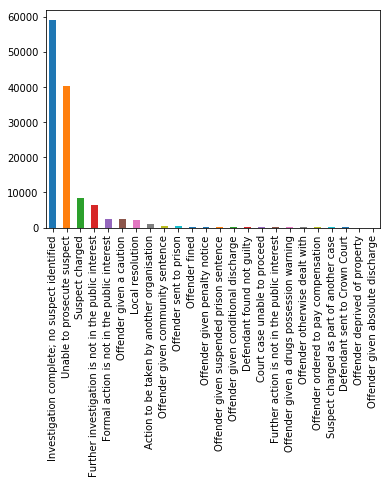

In [6]:
ssx_outcome['Outcome type'].value_counts().plot(kind = 'bar')
plt.show()

In [3]:
#loading the number of arrests dataset
arrest_by_ethnicity = pd.read_csv("number-of-arrests.csv", sep = ",")
arrest_by_ethnicity.head()

,Measure,Time,Time_type,Ethnicity,Ethnicity_type,Gender,Gender_type,Age_Group,Age_Group_type,Geography,Geography_type,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)",Notes
0,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Avon and Somerset,Police Force Area,10,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
1,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Bedfordshire,Police Force Area,25,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
2,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Cambridgeshire,Police Force Area,9,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
3,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Cheshire,Police Force Area,-,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
4,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Cleveland,Police Force Area,4,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN


In [22]:
arrest_by_ethnicity['Ethnicity'].describe()

count        218592
unique           23
top       Pakistani
freq           9504
Name: Ethnicity, dtype: object

In [11]:
#grouping the data by ethnicity to get a better understanding
table = arrest_by_ethnicity.groupby(['Ethnicity'])
table.describe()




Number of arrests                 \
                                                         count unique    top   
Ethnicity                                                                      
All                                                       9504   4996   -      
Any other asian                                           9504    776   -      
Any other black background                                9504    746   -      
Any other ethnic group                                    9504    683   -      
Any other mixed/multiple ethnic background                9504    576   -      
Any other white background                                9504   1624   -      
Asian                                                     9504   1423   -      
Bangladeshi                                               9504    546   -      
Black                                                     9504   1481   -      
Black African                                             9504    965   -      
Black Caribbean                                           9504    995   -      
Chinese                                                   9504    325   -      
Indian                                                    9504    736   -      
Mixed                                                     9504   1097   -      
Mixed White and Asian                                     9504    402   -      
Mixed White and Black African                             9504    414   -      
Mixed White and Black Caribbean                           9504    864   -      
Other                                                     9504    759   -      
Pakistani                                                 9504    944   -      
Unreported                                                9504   1251   -      
White                                                     9504   4732   -      
White British                                             9504   4680   -      
White Irish                                               9504    660   -      

                                                 Age_Group         \
                                            freq     count unique   
Ethnicity                                                           
All                                         1552      9504      6   
Any other asian                             3123      9504      6   
Any other black background                  3198      9504      6   
Any other ethnic group                      3132      9504      6   
Any other mixed/multiple ethnic background  3267      9504      6   
Any other white background                  2458      9504      6   
Asian                                       2774      9504      6   
Bangladeshi                                 4167      9504      6   
Black                                       2768      9504      6   
Black African                               3140      9504      6   
Black Caribbean                             3222      9504      6   
Chinese                                     4411      9504      6   
Indian                                      3776      9504      6   
Mixed                                       2961      9504      6   
Mixed White and Asian                       3905      9504      6   
Mixed White and Black African               3799      9504      6   
Mixed White and Black Caribbean             3241      9504      6   
Other                                       3044      9504      6   
Pakistani                                   3698      9504      6   
Unreported                                  2679      9504      6   
White                                       1716      9504      6   
White British                               1784      9504      6   
White Irish                                 3285      9504      6   

                                                                 \
                                                      top  freq   
Ethnicity                         

In [7]:
stop_search = pd.read_csv('2019-01-north-wales-stop-and-search.csv', sep = ',')
stop_search.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person and Vehicle search,2019-01-02T06:35:00+00:00,NaN,NaN,53.249814,-4.314271,Male,18-24,Mixed/Multiple ethnic groups - White and Black...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
1,Person search,2019-01-02T07:45:00+00:00,NaN,NaN,53.168301,-3.139843,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False
2,Person search,2019-01-02T12:40:00+00:00,NaN,NaN,53.227164,-4.125755,Female,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False
3,Person search,2019-01-02T12:46:00+00:00,NaN,NaN,53.227164,-4.125755,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False
4,Person search,2019-01-02T12:50:00+00:00,NaN,NaN,53.227164,-4.125755,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False


In [9]:
stop_search['Self-defined ethnicity'].describe()

count                                                   188
unique                                                    9
top       White - English/Welsh/Scottish/Northern Irish/...
freq                                                    157
Name: Self-defined ethnicity, dtype: object

In [2]:
#loading the street data
street_data = pd.read_csv('2019-01-north-wales-street.csv', sep = ",")
street_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,09fed2cb4ee7a0b163cbf6972eb02abdc384c898f5c968...,2019-01,North Wales Police,North Wales Police,-2.920150,53.179469,On or near High Street,E01018332,Cheshire West and Chester 043A,Burglary,Investigation complete; no suspect identified,NaN
1,80d7c9791889451d8a6929bf179a638991ceda04fb9d4f...,2019-01,North Wales Police,North Wales Police,-2.920150,53.179469,On or near High Street,E01018332,Cheshire West and Chester 043A,Shoplifting,Court result unavailable,NaN
2,34fb19a2d3b6379f9e567a0546171f76446c6603073f2d...,2019-01,North Wales Police,North Wales Police,-2.920150,53.179469,On or near High Street,E01018332,Cheshire West and Chester 043A,Shoplifting,Investigation complete; no suspect identified,NaN
3,ca53a8b9e995132cae0fbae422bcdaa4023502598d1ac4...,2019-01,North Wales Police,North Wales Police,-2.920150,53.179469,On or near High Street,E01018332,Cheshire West and Chester 043A,Shoplifting,Court result unavailable,NaN
4,e1a608b2d5b0f2192acbacae8d1b25126c5dfde7ae8a56...,2019-01,North Wales Police,North Wales Police,-2.925943,53.172647,On or near Halkett Close,E01018352,Cheshire West and Chester 044B,Violence and sexual offences,Unable to prosecute suspect,NaN


In [21]:
sussex_stop_search1 = pd.read_csv('2019-01-sussex-stop-and-search.csv', sep = ',')
sussex_stop_search2 = pd.read_csv('2019-02-sussex-stop-and-search.csv', sep = ',')
sussex_stop_search3 = pd.read_csv('2019-03-sussex-stop-and-search.csv', sep = ',')
sussex_stop_search4 = pd.read_csv('2019-04-sussex-stop-and-search.csv', sep = ',')
sussex_stop_search5 = pd.read_csv('2019-05-sussex-stop-and-search.csv', sep = ',')
sussex_stop_search6 = pd.read_csv('2019-06-sussex-stop-and-search.csv', sep = ',')
sussex_stop_search7 = pd.read_csv('2019-07-sussex-stop-and-search.csv', sep = ',')
sussex_stop_search8 = pd.read_csv('2019-08-sussex-stop-and-search.csv', sep = ',')
sussex_stop_search9 = pd.read_csv('2019-09-sussex-stop-and-search.csv', sep = ',')
sussex_stop_search10 = pd.read_csv('2019-10-sussex-stop-and-search.csv', sep = ',')
sussex_stop_search11 = pd.read_csv('2019-11-sussex-stop-and-search.csv', sep = ',')
sussex_stop_search12 = pd.read_csv('2019-12-sussex-stop-and-search.csv', sep = ',')

dataframes = [sussex_stop_search1,sussex_stop_search2,sussex_stop_search3,sussex_stop_search4,sussex_stop_search5,
              sussex_stop_search6,sussex_stop_search7,sussex_stop_search8,sussex_stop_search9,sussex_stop_search10,
              sussex_stop_search11,sussex_stop_search12]

ssx_stopnsearch = pd.concat(dataframes, ignore_index = True)
ssx_stopnsearch.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2019-01-01T00:00:00+00:00,False,NaN,50.814738,-0.410825,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Penalty Notice for Disorder,False,False
1,Person search,2019-01-01T00:00:00+00:00,False,NaN,50.818246,-0.506873,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Penalty Notice for Disorder,False,False
2,Person and Vehicle search,2019-01-01T00:00:00+00:00,False,NaN,50.823420,-0.373189,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False
3,Person and Vehicle search,2019-01-01T00:00:00+00:00,False,NaN,51.114697,-0.176446,Female,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,NaN,True,False
4,Person search,2019-01-01T00:00:00+00:00,False,NaN,50.818246,-0.506873,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Penalty Notice for Disorder,False,False


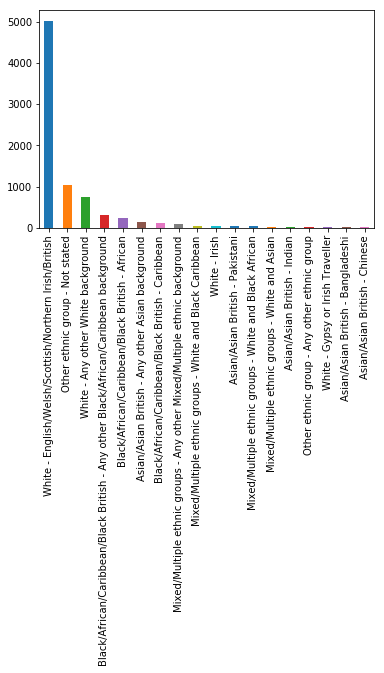

In [22]:
ssx_stopnsearch['Self-defined ethnicity'].value_counts().plot(kind = 'bar')
plt.show()

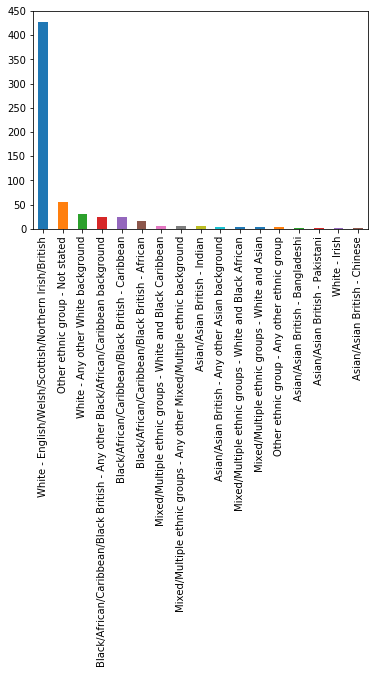

In [15]:
sussex_stop_search['Self-defined ethnicity'].value_counts().plot(kind = 'bar')
plt.show()